In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics


listings = pd.read_csv("https://raw.githubusercontent.com/brandonywl/cz1015-miniproject/master/listings.csv")
listings.head()
variables = [var for var in listings]

In [92]:
listing = pd.DataFrame(listings)
# Variables I've identified to drop which I will .remove() from a copy of my variable list
columns_to_drop=['street','state','city','country','country_code','listing_url','scrape_id','last_scraped','experiences_offered','notes','thumbnail_url','medium_url','picture_url',
                           'xl_picture_url','host_id','host_url','host_location','host_about','host_response_time',"host_acceptance_rate",
                           "host_is_superhost","host_thumbnail_url","host_picture_url","host_verifications","host_has_profile_pic","host_identity_verified",
                           "neighbourhood_cleansed","neighbourhood_group_cleansed","market","is_location_exact",
                           "bed_type","guests_included","extra_people","minimum_nights","maximum_nights","calendar_updated",
                           "calendar_last_scraped", "first_review", "last_review","jurisdiction_names", "requires_license",
                           "license", "availability_60", "availability_90", 'name', 'summary', 'space', 'description',
                           'neighborhood_overview','transit','host_name','host_since','host_response_rate', 'host_neighbourhood','host_listings_count',
                           'host_total_listings_count', 'smart_location','weekly_price','monthly_price', 'security_deposit',
                           'cleaning_fee','has_availability','availability_30','availability_365','number_of_reviews','review_scores_rating',
                           'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication',
                           'review_scores_location','review_scores_value','instant_bookable','cancellation_policy',
                           'require_guest_profile_picture','require_guest_phone_verification','calculated_host_listings_count','reviews_per_month']

list_copy = variables.copy()

# .remove() here for each of the variable identified. If there is wrong spelling or the data is deleted, just skip
for var in columns_to_drop:
  try:
    list_copy.remove(var)
  except ValueError:
    pass

# Create a clean DF for me to continue observing / use for further cleaning
clean_listings = pd.DataFrame(listings[list_copy])
clean_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 14 columns):
id               3818 non-null int64
neighbourhood    3402 non-null object
zipcode          3811 non-null object
latitude         3818 non-null float64
longitude        3818 non-null float64
property_type    3817 non-null object
room_type        3818 non-null object
accommodates     3818 non-null int64
bathrooms        3802 non-null float64
bedrooms         3812 non-null float64
beds             3817 non-null float64
amenities        3818 non-null object
square_feet      97 non-null float64
price            3818 non-null object
dtypes: float64(6), int64(2), object(6)
memory usage: 417.7+ KB


In [95]:

incomplete_data =['neighbourhood','square_feet','zipcode','property_type','bathrooms','beds','bedrooms']
for var in incomplete_data:
    clean_listings[var].fillna(value = 0, inplace = True)
 
#convert the price from string to float 
clean_listings["price"]=clean_listings["price"].str.replace("$","")
clean_listings["price"]=clean_listings["price"].str.replace(",","")
clean_listings["price"]=clean_listings["price"].astype("float64")

clean_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 14 columns):
id               3818 non-null int64
neighbourhood    3818 non-null object
zipcode          3818 non-null object
latitude         3818 non-null float64
longitude        3818 non-null float64
property_type    3818 non-null object
room_type        3818 non-null object
accommodates     3818 non-null int64
bathrooms        3818 non-null float64
bedrooms         3818 non-null float64
beds             3818 non-null float64
amenities        3818 non-null object
square_feet      3818 non-null float64
price            3818 non-null float64
dtypes: float64(7), int64(2), object(5)
memory usage: 417.7+ KB


Intercept of Regression 	: b =  [-20097.98188186]
Coefficients of Regression 	: a =  [[-6.45038689e+01 -1.89484248e+02  1.81465289e+01  2.32652509e+01
   2.40481070e+01 -2.19855339e+00 -2.81705000e-03]]

     Predictors  Coefficients
0      latitude    -64.503869
1     longitude   -189.484248
2  accommodates     18.146529
3     bathrooms     23.265251
4      bedrooms     24.048107
5          beds     -2.198553
6   square_feet     -0.002817



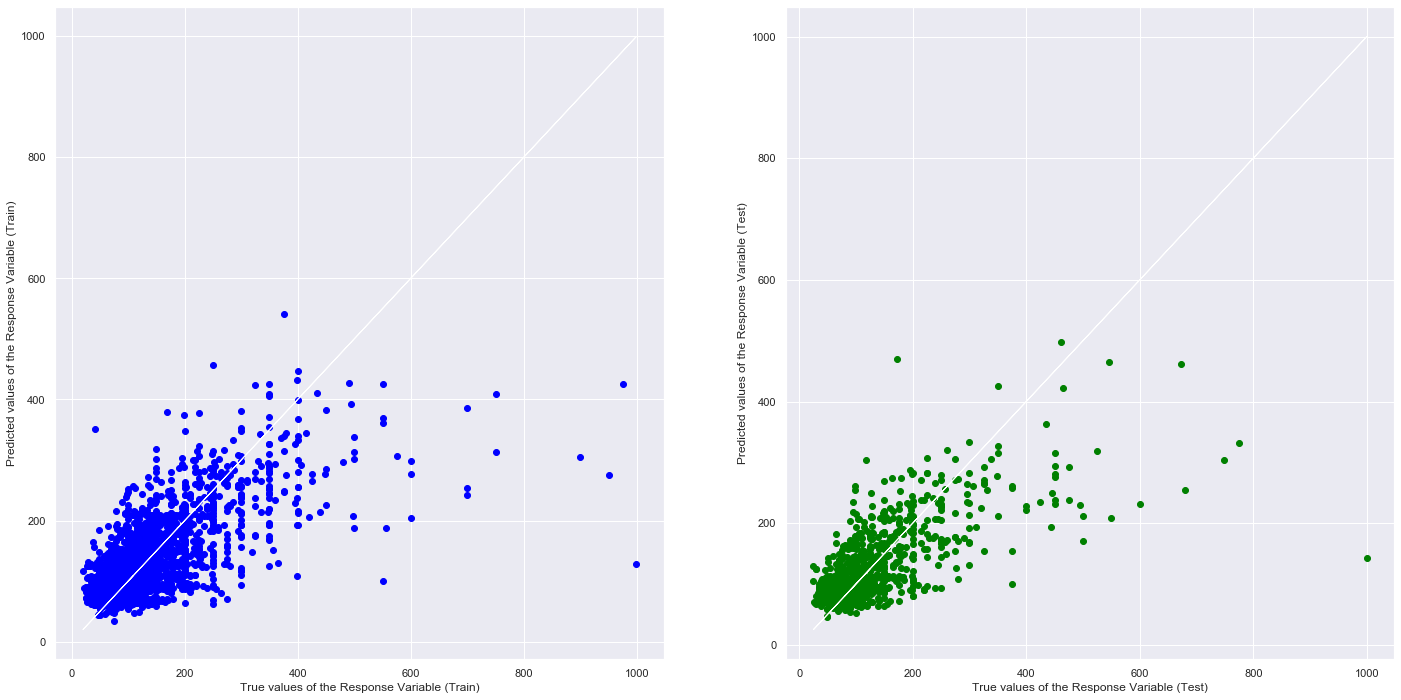

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.48908128009763074
Mean Squared Error (MSE) 	: 3938.141609811722

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.4742395940496468
Mean Squared Error (MSE) 	: 4961.63428221185



In [96]:

# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y = pd.DataFrame(clean_listings["price"])
X = pd.DataFrame(clean_listings[["latitude", "longitude", "accommodates","bathrooms","bedrooms","beds","square_feet"]])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Intercept of Regression 	: b =  [-20510.79769768]
Coefficients of Regression 	: a =  [[-5.61541239e+01 -1.89573320e+02  1.89225181e+01  2.63878955e+01
   2.19238176e+01 -1.45494891e+00  1.80860306e-03]]

     Predictors  Coefficients
0      latitude    -56.154124
1     longitude   -189.573320
2  accommodates     18.922518
3     bathrooms     26.387895
4      bedrooms     21.923818
5          beds     -1.454949
6   square_feet      0.001809



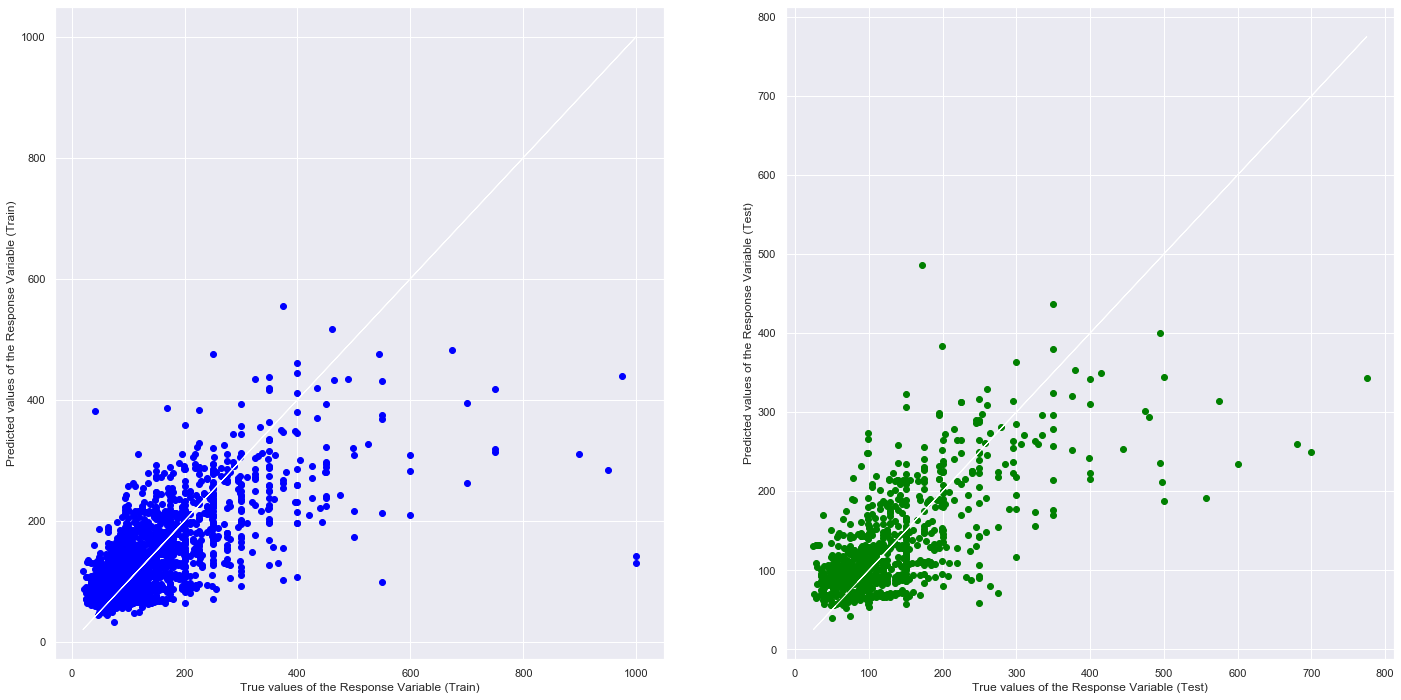

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.48707223743220884
Mean Squared Error (MSE) 	: 4248.997842697606

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.47910413428226195
Mean Squared Error (MSE) 	: 4021.6213108127436



In [91]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
predictors = ["latitude", "longitude", "accommodates","bathrooms","bedrooms","beds","square_feet"]

y = pd.DataFrame(clean_listings["price"])
X = pd.DataFrame(clean_listings[predictors])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

In [99]:
# Extract Pokemons for Prediction
price_pred = clean_listings[clean_listings["id"].isin(["4053092", "6886633", "8820414"])]
price_pred

# Extract Predictors for Prediction
X_pred = pd.DataFrame(price_pred[predictors])

# Predict Response corresponding to Predictors
y_pred = linreg.predict(X_pred)
y_pred

# Summarize the Actuals, Predictions and Errors
y_pred = pd.DataFrame(y_pred, columns = ["Predprice"], index = price_pred.index)
price_acc = pd.concat([price_pred[["id", "price"]], y_pred], axis = 1)

y_errs = 100 * abs(price_acc["price"] - price_acc["Predprice"]) / price_acc["price"]
y_errs = pd.DataFrame(y_errs, columns = ["Error"], index = price_pred.index)
price_acc = pd.concat([price_acc, y_errs], axis = 1)

price_acc

MSE_train = mean_squared_error(y_train, y_train_pred)
StdE_pred = np.sqrt(len(y_train) * MSE_train/(len(y_train) - 2))

print("Mean Squared Error (MSE) \t:", MSE_train.round(2))
print("Pred Standard Error (SE) \t:", StdE_pred.round(2))

y_95l = pd.DataFrame(price_acc["Predprice"] - 1.96*StdE_pred).rename(columns = {"Predprice" : "95 Lower"})
y_95u = pd.DataFrame(price_acc["Predprice"] + 1.96*StdE_pred).rename(columns = {"Predprice" : "95 Upper"})
y_99l = pd.DataFrame(price_acc["Predprice"] - 2.58*StdE_pred).rename(columns = {"Predprice" : "99 Lower"})
y_99u = pd.DataFrame(price_acc["Predprice"] + 2.58*StdE_pred).rename(columns = {"Predprice" : "99 Upper"})

price_int = pd.concat([price_acc, y_95l, y_95u, y_99l, y_99u], axis = 1)
price_int

Mean Squared Error (MSE) 	: 3938.14
Pred Standard Error (SE) 	: 62.78


,id,price,Predprice,Error,95 Lower,95 Upper,99 Lower,99 Upper
177,4053092,80.0,94.438898,18.048622,-28.603130,217.480926,-67.524588,256.402383
178,6886633,75.0,71.495512,4.672651,-51.546516,194.537540,-90.467974,233.458998
179,8820414,80.0,134.885041,68.606301,11.843013,257.927069,-27.078445,296.848526


In [100]:
obj_clean_listings = clean_listings.select_dtypes(include=['object']).copy()
obj_clean_listings.head()

,neighbourhood,zipcode,property_type,room_type,amenities
0,Queen Anne,98119,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
1,Queen Anne,98119,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",Kitchen,""Free..."
2,Queen Anne,98119,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
3,Queen Anne,98119,Apartment,Entire home/apt,"{Internet,""Wireless Internet"",Kitchen,""Indoor ..."
4,Queen Anne,98119,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki..."


In [105]:
obj_clean_listings["room_type"].value_counts()

Entire home/apt    2541
Private room       1160
Shared room         117
Name: room_type, dtype: int64

In [106]:
cleanup_room_type = {"room_type":     {"Entire home/apt": 2, "Private room": 1, "Shared room": 0}}

In [108]:
obj_clean_listings.replace(cleanup_room_type, inplace=True)
obj_clean_listings.head()

,neighbourhood,zipcode,property_type,room_type,amenities
0,Queen Anne,98119,Apartment,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
1,Queen Anne,98119,Apartment,2,"{TV,Internet,""Wireless Internet"",Kitchen,""Free..."
2,Queen Anne,98119,House,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
3,Queen Anne,98119,Apartment,2,"{Internet,""Wireless Internet"",Kitchen,""Indoor ..."
4,Queen Anne,98119,House,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki..."


In [109]:
obj_clean_listings["property_type"].value_counts()

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Bungalow             13
Camper/RV            13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Chalet                2
Yurt                  1
0                     1
Name: property_type, dtype: int64

cleanup_property_type = {"property_type":     {"House": 16, "Apartment": 15, "Townhouse": 0: 14, "Condominium": 13, "Loft": 12, "Bed & Breakfast": 11, "Other": 10, "Cabin": 9, "Bungalow": 8, "Camper/RV": 7, "Boat": 6, "Tent": 5, "Treehouse": 4, "Dorm": 3, "Chalet": 2, "Yurt": 1, "0": 0}}

obj_clean_listings.replace(cleanup_room_type, inplace=True)
obj_clean_listings.head()

In [115]:
cleanup_property_type= {"property_type":     {"House": 16, 
                   "Apartment": 15, 
                   "Townhouse": 14, 
                   "Condominium": 13, "Loft":12, 
                   "Bed & Breakfast": 11, 
                   "Other": 10, 
                   "Cabin": 9, 
                   "Bungalow": 8, 
                   "Camper/RV":7, 
                   "Boat":6, 
                   "Tent":5, 
                   "Treehouse": 4, 
                   "Dorm": 3, 
                   "Chalet":2, 
                   "Yurt": 1, 
                   "0":0}}
obj_clean_listings.replace(cleanup_property_type, inplace=True)
obj_clean_listings.head()

,neighbourhood,zipcode,property_type,room_type,amenities
0,Queen Anne,98119,15,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
1,Queen Anne,98119,15,2,"{TV,Internet,""Wireless Internet"",Kitchen,""Free..."
2,Queen Anne,98119,16,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
3,Queen Anne,98119,15,2,"{Internet,""Wireless Internet"",Kitchen,""Indoor ..."
4,Queen Anne,98119,16,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki..."


In [117]:
obj_clean_listings["zipcode"].value_counts()

98122        420
98103        394
98102        339
98105        225
98109        202
98101        201
98144        200
98121        196
98107        180
98115        178
98112        167
98117        164
98118        154
98119        143
98116        112
98104         95
98125         71
98199         66
98126         63
98106         58
98108         56
98133         46
98136         44
98177         19
98178          7
0              7
98134          5
98146          5
99\n98122      1
Name: zipcode, dtype: int64